practical 4 IR  agglomartive clusteing

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [21]:
X = pd.read_csv('https://raw.githubusercontent.com/gaikwadshantanu12/adypsoe_aids/refs/heads/master/BE/IR_Practicals/datasets/CC_GENERAL.csv')
# Dropping the CUST_ID column from the data
X = X.drop('CUST_ID', axis = 1)
X.fillna(method ='ffill', inplace = True)

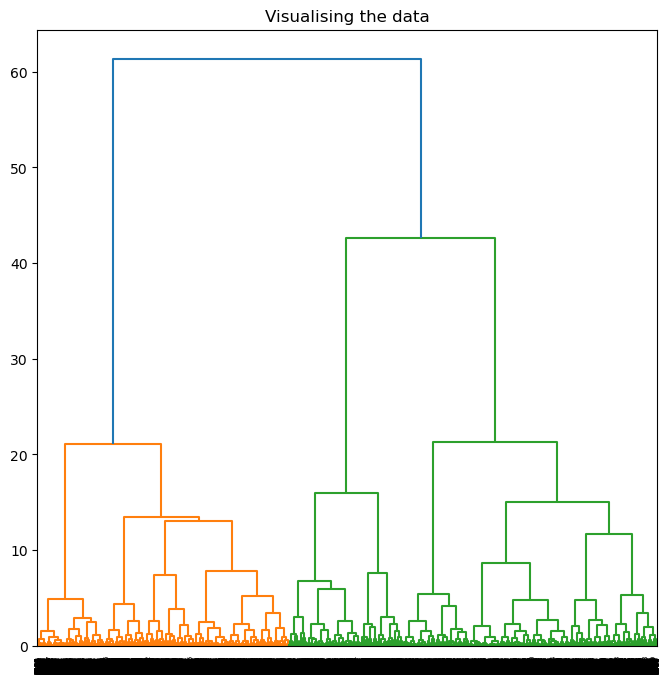

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
DataFrameX_normalized = pd.DataFrame(X_normalized)
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

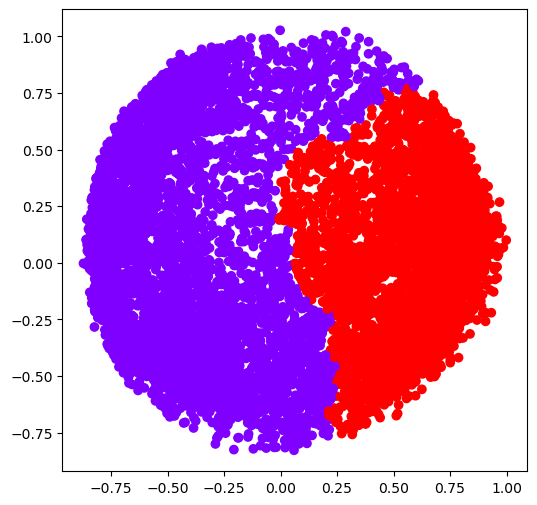

In [23]:
ac2 = AgglomerativeClustering(n_clusters = 2)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

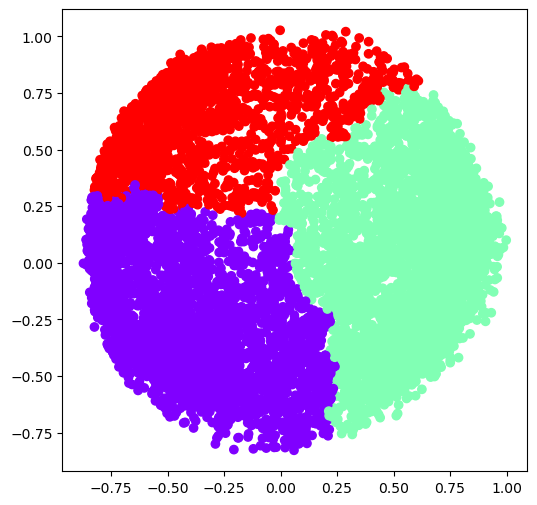

In [24]:
ac3 = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

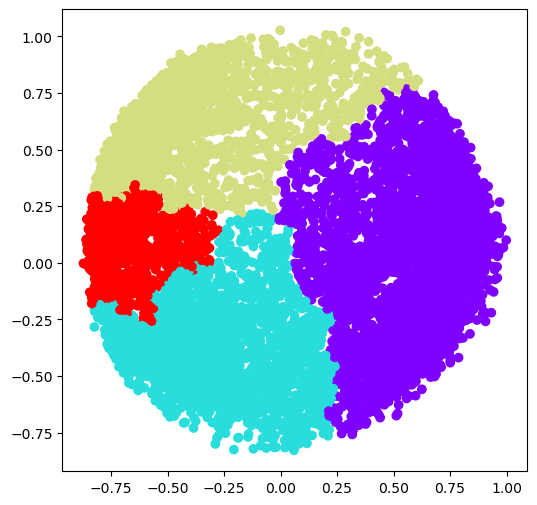

In [25]:
ac4 = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

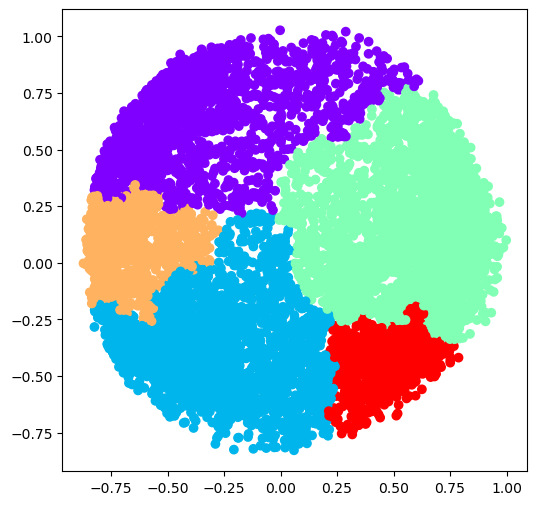

In [26]:
ac5 = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

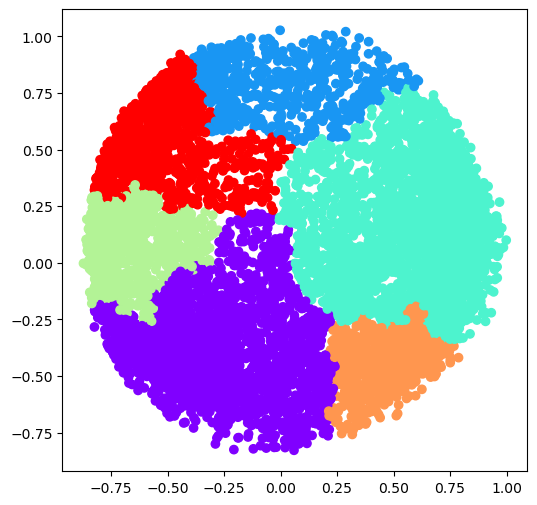

In [27]:
ac6 = AgglomerativeClustering(n_clusters = 6)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()

practical 2 IR inverted files

In [28]:
import json

docs = {
        "doc1" : ["mango","apple","grapes"],
        "doc2": ["peas","mango"],
        "doc3": ["mango","grapes","peas"],
        "doc4": ["apple","grapes"]
}

inverted_files = {}

for doc,fruits in docs.items():
    for fruit in fruits:
        if fruit not in inverted_files:
            inverted_files[fruit] = [doc]
        else:
            inverted_files[fruit].append(doc)
print('Inverted FIles :')
print(json.dumps(inverted_files,indent=4))

Inverted FIles :
{
    "mango": [
        "doc1",
        "doc2",
        "doc3"
    ],
    "apple": [
        "doc1",
        "doc4"
    ],
    "grapes": [
        "doc1",
        "doc3",
        "doc4"
    ],
    "peas": [
        "doc2",
        "doc3"
    ]
}


In [30]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

In [31]:
heartDisease = pd.read_csv('https://raw.githubusercontent.com/gaikwadshantanu12/adypsoe_aids/refs/heads/master/BE/IR_Practicals/datasets/heart.csv')
heartDisease = heartDisease.replace('?',np.nan)

In [32]:
heartDisease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [33]:
model = BayesianModel([('age','trestbps'),('age','fbs'),('sex','trestbps'),('exang','trestbps'),('trestbps','heartdisease'),
                       ('fbs','heartdisease'),('heartdisease','restecg'), ('heartdisease','thalach'),('heartdisease','chol')])

# Learning CPDs using Maximum Likelihood Estimators
print('\nLearning CPD using Maximum likelihood estimators')
model.fit(heartDisease, estimator=MaximumLikelihoodEstimator)

# Inferencing with Bayesian Network 
print('Inferencing with Bayesian Network:') 
HeartDisease_infer = VariableElimination(model)

# Computing the Probability of HeartDisease given Age
print('1. Probability of HeartDisease given Age=38') 
q = HeartDisease_infer.query(variables=['heartdisease'], evidence={'age':38})
print(q)

# Computing the Probability of HeartDisease given cholesterol 
print('\n 2. Probability of HeartDisease given cholesterol=230') 
q=HeartDisease_infer.query(variables=['heartdisease'], evidence ={'chol':230})
print(q)


Learning CPD using Maximum likelihood estimators


Inferencing with Bayesian Network:
1. Probability of HeartDisease given Age=38
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.7026 |
+-----------------+---------------------+
| heartdisease(1) |              0.1024 |
+-----------------+---------------------+
| heartdisease(2) |              0.0577 |
+-----------------+---------------------+
| heartdisease(3) |              0.0631 |
+-----------------+---------------------+
| heartdisease(4) |              0.0741 |
+-----------------+---------------------+

 2. Probability of HeartDisease given cholesterol=230
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.0000 |
+-----------------+---------------------+
| heartdisease(1) |              0.3270 |
+-----------------+---------------------+
| heartdisease(2) |       

In [35]:
import nltk
print(nltk.data.path)

['C:\\Users\\admin/nltk_data', 'C:\\ProgramData\\anaconda3\\nltk_data', 'C:\\ProgramData\\anaconda3\\share\\nltk_data', 'C:\\ProgramData\\anaconda3\\lib\\nltk_data', 'C:\\Users\\admin\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [49]:
!rm -rf C:/ProgramData/anaconda3/nltk_data

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [38]:
text = 'The quick brown fox jumps over the lazy dog While the dog sleeps the fox quickly runs to the nearby forest'

In [50]:
# tokenization
from nltk.tokenize import word_tokenize
import io
from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
nltk_tokens = word_tokenize(text)
print('Tokens:')
print(nltk_tokens)

Tokens:
['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', 'While', 'the', 'dog', 'sleeps', 'the', 'fox', 'quickly', 'runs', 'to', 'the', 'nearby', 'forest']


In [ ]:
# stop word removal
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
filtered_words = [word for word in nltk_tokens if word not in stop_words]
filtered_words

In [43]:
# stemming
from nltk.stem import PorterStemmer

ps = PorterStemmer()
stemmed_words = [ps.stem(word) for word in nltk_tokens]
print(' '.join(stemmed_words))

the quick brown fox jump over the lazi dog while the dog sleep the fox quickli run to the nearbi forest


In [ ]:
# lemmatization
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word,'a') for word in nltk_tokens]
print(' '.join(lemmatized_words))